In [90]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
# things we need for Tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import adam
import tensorflow as tf
import re
import pandas as pd
import json
import pickle
import random

# load dataset from json file which is given in the folder
with open('try.json',encoding='utf-8') as json_data:
    intents = json.load(json_data)

context = {}



In [91]:
words = []
classes = []
documents = []
ignore_words = ['?']

f=open("stopwords.txt",'r',encoding="utf-8")
#stopword = ['?'] 
ignore_word=f.read().splitlines()
f.close()
ignore_words.extend(ignore_word)
print (ignore_words)

def remove_stopwords(text):
	modified_word_list=[word for word in text if not word  in ignore_words]
	return modified_word_list

# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words]
words= remove_stopwords(words)
words = sorted(list(set(words)))

words =[i.replace('ኀ','ሀ').replace('ሐ','ሀ').replace('ሃ','ሀ').replace('ኃ','ሀ').replace('ሓ','ሀ').replace('ኁ','ሁ').replace('ሑ','ሁ').replace('ሒ','ሂ').replace('ኂ','ሂ').replace('ኄ','ሄ').replace('ሔ','ሄ').replace('ሕ','ህ').replace('ኅ','ህ').replace('ሖ','ሆ').replace('ኆ','ሆ').replace('ጸ','ፀ').replace('ጹ','ፁ').replace('ጺ','ፂ').replace('ጻ','ፃ').replace('ጼ','ፄ').replace('ጽ','ፅ').replace('ጾ','ፆ').replace('ቸ,','ቼ').replace('ሸ','ሼ').replace('ዬ','የ').replace('ዉ','ው').replace('ሓ','ሀ').replace('ሠ','ሰ').replace('ሡ','ሱ').replace('ሢ','ሲ').replace('ሣ','ሳ').replace('ሤ','ሴ').replace('ሥ','ስ').replace('ሦ','ሶ').replace('ዐ','አ').replace('ዑ','ኡ').replace('ዒ','ኢ').replace('ዓ','አ').replace('ኣ','አ').replace('ዔ','ኤ').replace('ዕ','እ').replace('ዖ','ኦ') for i in words]
words =[i.replace('መካኒካል','ሜካኒካል').replace('ኢንጂነሪንግ','ምህንድስና').replace('ሰፍትዌር','ሶፍትዌር').replace('ሲስተም','ስይስተም').replace('ከሚካል','ኬሚካል').replace('ደምወዝ','ደሞዝ').replace('ዶሞዝ','ደሞዝ').replace('አርኪተክቸር','አርክተክቸር').replace('ኢሌክትሪካል','ኤሌክትሪካል').replace('ኮምፒተር','ኮምፕዩተር').replace('ሳይነስ','ሳይንስ').replace('ኢንፎርመሽን','ኢንፎርሜሽን').replace('ኢንዱስትርያል','ኢንዳስትሪያል').replace('ኢንዱስትሪያል','ኢንዳስትሪያል').replace('መሃንዲስ','መሀንድስ') for i in words]

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique stemmed words", words)

['?', 'ተብሎ', 'የሚጠራ', 'ሲሆን', 'ይህም', 'ወይም', 'በሌሎች', 'ላይ', 'ነው', 'በ ', 'የ ', 'ከ', 'ሊሆኑ', 'ማለት', 'ይችላሉ', 'ወይ', 'ይችላል', 'በጣም', 'ከመሆን', 'የተነሳ', 'ወደ', 'ሙሉ', 'አይነት', 'ጨምሮ', 'የአንድ', 'አንድ', 'ግለሰብ', 'የሆነ', 'ሁኔታ', 'ውስጥ', 'ናቸው', 'ማለትም', 'የሚገኙ', 'በአደገኛ', 'አደገኛ', 'ወይንም', 'በአንድ', 'እንዲሁም', 'ሲሆን', 'በግዜው', 'ጨምሮ', 'ያሉ', 'ሰዎች', 'በአብዛኛውን', 'ሰው', 'ምንም', 'ሆኖ', 'ከሰው', 'ወደ', 'ከባድ', 'ምንድ', 'ምንድን', 'ምንድነው', 'ምንድናቸው', 'ነው', 'ናቸው', 'ስንል', 'ምን', 'ማለታችን', 'ማለት', 'አለው', 'የምን', 'የያዘው', 'እንዴት', 'የያዘውን', 'ሊሆን', 'የምን', 'በምን', 'የሚችል', 'ማን', 'በተለየ', 'በአብዛኛው', 'የቱን', 'የትኛው', 'እንዴት', 'አይነቶች', 'አለብን', 'ያለብን', 'ከመያዛችን', 'በፊት', 'የመያዝ', 'አጋጣሚን', 'አጋጣሚ', 'እንዳለብን', 'አሉት', 'በሰአቱ', 'በግዜው', 'ሁሉ', 'ሁሉም', 'ሆነ', 'ሆኖም', 'ሁሉንም', 'ማለት', 'ማን', 'ብቻ', 'ነገር', 'ነገሮች', 'ናቸው', 'አሁን', 'አለ', 'እስከ', 'እንኳን', 'እስከ', 'እዚሁ', 'እና', 'እንደ', 'ከ', 'ወዘተ', 'ወይም', 'ዋና', 'ይህ', 'ደግሞ', 'ጋራ', 'ግን', 'ጋር', 'ሆኖም', 'ማን', 'ለማን', 'ማነው', 'ማንማን', 'ማንን', 'ከማንኛው', 'ማንኛው', 'በማን', 'ጥቀስ', 'ግለፅ', 'ዘርዝር', 'ጥራ', 'ምን', 'ምንድን', 'የምን', 'ለምን', 'በምን', 'ወይ', 'ይሆን', 'እንደ', 'እንዴት']
1063 do

In [92]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word - create base word, in attempt to represent related words
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])

In [93]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
x = list(training[:,0])
y = list(training[:,1])


from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x, y, test_size=.2, random_state=42)

print(len(train_x))
print(len(train_y))
print(len(test_y))

val_x=np.array(test_x)
val_y=np.array(test_y)

850
850
213


In [94]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(64, input_shape=(len(train_x[0]),), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, ))
model.add(Dense(32,))

#model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [95]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
Adam = adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])

# Fit the model
history=model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=8,validation_data=(val_x,val_y), verbose=1)

Train on 850 samples, validate on 213 samples
Epoch 1/150
850/850 [==============================] - 2s 3ms/step - loss: 4.8264 - acc: 0.0129 - val_loss: 4.8117 - val_acc: 0.0000e+00
Epoch 2/150
850/850 [==============================] - 1s 718us/step - loss: 4.7924 - acc: 0.0212 - val_loss: 4.7787 - val_acc: 0.0141
Epoch 3/150
850/850 [==============================] - 1s 689us/step - loss: 4.7513 - acc: 0.0271 - val_loss: 4.7359 - val_acc: 0.0047
Epoch 4/150
850/850 [==============================] - 1s 706us/step - loss: 4.6970 - acc: 0.0212 - val_loss: 4.6786 - val_acc: 0.0047
Epoch 5/150
850/850 [==============================] - 0s 553us/step - loss: 4.6255 - acc: 0.0212 - val_loss: 4.6052 - val_acc: 0.0047
Epoch 6/150
850/850 [==============================] - 0s 517us/step - loss: 4.5374 - acc: 0.0212 - val_loss: 4.5178 - val_acc: 0.0047
Epoch 7/150
850/850 [==============================] - 0s 499us/step - loss: 4.4429 - acc: 0.0212 - val_loss: 4.4313 - val_acc: 0.0047
Epoch 8

Epoch 61/150
850/850 [==============================] - 0s 528us/step - loss: 0.4613 - acc: 0.9388 - val_loss: 0.7356 - val_acc: 0.8498
Epoch 62/150
850/850 [==============================] - 0s 492us/step - loss: 0.4400 - acc: 0.9365 - val_loss: 0.7165 - val_acc: 0.8545
Epoch 63/150
850/850 [==============================] - 0s 492us/step - loss: 0.4176 - acc: 0.9412 - val_loss: 0.6985 - val_acc: 0.8545
Epoch 64/150
850/850 [==============================] - 0s 487us/step - loss: 0.3985 - acc: 0.9471 - val_loss: 0.6785 - val_acc: 0.8592
Epoch 65/150
850/850 [==============================] - 0s 496us/step - loss: 0.3802 - acc: 0.9482 - val_loss: 0.6601 - val_acc: 0.8638
Epoch 66/150
850/850 [==============================] - 0s 481us/step - loss: 0.3620 - acc: 0.9482 - val_loss: 0.6429 - val_acc: 0.8638
Epoch 67/150
850/850 [==============================] - 0s 489us/step - loss: 0.3450 - acc: 0.9506 - val_loss: 0.6282 - val_acc: 0.8638
Epoch 68/150
850/850 [==========================

850/850 [==============================] - 0s 491us/step - loss: 0.0607 - acc: 0.9824 - val_loss: 0.3495 - val_acc: 0.9437
Epoch 122/150
850/850 [==============================] - 0s 488us/step - loss: 0.0600 - acc: 0.9824 - val_loss: 0.3491 - val_acc: 0.9437
Epoch 123/150
850/850 [==============================] - 0s 493us/step - loss: 0.0589 - acc: 0.9800 - val_loss: 0.3504 - val_acc: 0.9437
Epoch 124/150
850/850 [==============================] - 0s 466us/step - loss: 0.0584 - acc: 0.9824 - val_loss: 0.3488 - val_acc: 0.9437
Epoch 125/150
850/850 [==============================] - 0s 492us/step - loss: 0.0578 - acc: 0.9788 - val_loss: 0.3490 - val_acc: 0.9437
Epoch 126/150
850/850 [==============================] - 0s 489us/step - loss: 0.0570 - acc: 0.9824 - val_loss: 0.3489 - val_acc: 0.9437
Epoch 127/150
850/850 [==============================] - ETA: 0s - loss: 0.0578 - acc: 0.979 - 0s 471us/step - loss: 0.0562 - acc: 0.9800 - val_loss: 0.3490 - val_acc: 0.9437
Epoch 128/150
850

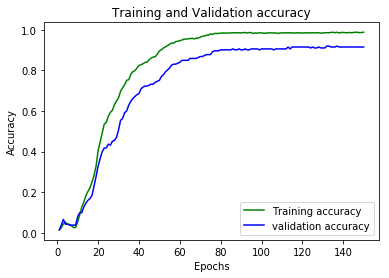

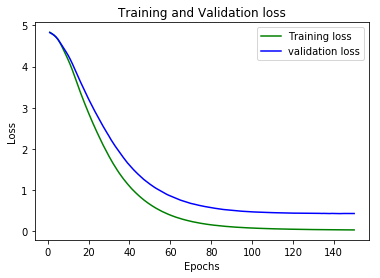

In [54]:
import matplotlib.pyplot as plt
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1, len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
pred = model.predict(val_x)
predicted=np.argmax(pred, axis=1)
report=classification_report(np.argmax(val_y, axis=1),predicted)

result = model.evaluate(val_x,val_y, verbose=0)
#res=np.argmax(result, axis=1)
f1=f1_score(np.argmax(val_y, axis=1),predicted,average="macro")
precision=precision_score(np.argmax(val_y, axis=1),predicted,average="macro")
recall=recall_score(np.argmax(val_y, axis=1),predicted,average="macro")

print("Accuracy: %.2f%%" % (result[1]*100))

#y_pred = model.predict(testx)
print("F1 Score: %.2f%%" % (f1*100))
print("Precision Score: %.2f%%" % (precision*100)) 
print("Recall Score: %.2f%%" % (recall*100))

Accuracy: 91.55%
F1 Score: 85.21%
Precision Score: 85.98%
Recall Score: 87.13%


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\GoitoM

In [10]:
print(report)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         1
          5       0.67      1.00      0.80         4
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         3
         10       1.00      1.00      1.00         3
         11       1.00      1.00      1.00         3
         13       0.00      0.00      0.00         2
         14       1.00      1.00      1.00         3
         15       1.00      1.00      1.00         1
         17       1.00      1.00      1.00         1
         21       1.00      1.00      1.00         5
         22       0.00      0.00      0.00         0
         25       1.00      1.00      1.00         2
         26       1.00      0.67      0.80         3
         28       1.00      1.00      1.00         4
         29       1.00      1.00      1.00   

In [87]:
def remove_stopwords(text):
	modified_word_list=[word for word in text if not word  in ignore_words]
	return modified_word_list

def normalize(sentence):
    text=sentence.replace('ኀ','ሀ').replace('ሐ','ሀ').replace('ሃ','ሀ').replace('ኃ','ሀ').replace('ሓ','ሀ').replace('ኁ','ሁ').replace('ሑ','ሁ').replace('ሒ','ሂ').replace('ኂ','ሂ').replace('ኄ','ሄ').replace('ሔ','ሄ').replace('ሕ','ህ').replace('ኅ','ህ').replace('ሖ','ሆ').replace('ኆ','ሆ').replace('ጸ','ፀ').replace('ጹ','ፁ').replace('ጺ','ፂ').replace('ጻ','ፃ').replace('ጼ','ፄ').replace('ጽ','ፅ').replace('ጾ','ፆ').replace('ቸ,','ቼ').replace('ሸ','ሼ').replace('የ','ዬ').replace('ዉ','ው').replace('ሓ','ሀ').replace('ሠ','ሰ').replace('ሡ','ሱ').replace('ሢ','ሲ').replace('ሣ','ሳ').replace('ሤ','ሴ').replace('ሥ','ስ').replace('ሦ','ሶ').replace('ዐ','አ').replace('ዑ','ኡ').replace('ዒ','ኢ').replace('ዓ','ኣ').replace('ዔ','ኤ').replace('ዕ','እ').replace('ዖ','ኦ')
    text =sentence.replace('መካኒካል','ሜካኒካል').replace('ኣ','አ').replace('ኣው','አዎ').replace('አው','አዎ').replace('ኢንጂነሪንግ','ምህንድስና').replace('ሰፍትዌር','ሶፍትዌር').replace('ሲስተም','ስይስተም').replace('ከሚካል','ኬሚካል').replace('ደምወዝ','ደሞዝ').replace('ዶሞዝ','ደሞዝ').replace('አርኪተክቸር','አርክተክቸር').replace('ኢሌክትሪካል','ኤሌክትሪካል').replace('ኮምፒተር','ኮምፕዩተር').replace('ሳይነስ','ሳይንስ').replace('ኢንፎርመሽን','ኢንፎርሜሽን').replace('ኢንዱስትርያል','ኢንዳስትሪያል').replace('ኢንዱስትሪያል','ኢንዳስትሪያል').replace('መሃንዲስ','መሀንድስ')
    return(text)
    
def clean_up_sentence(sentence):
    sentence_words= normalize(sentence)
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words if word not in ignore_words]
    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [84]:
model.save('model_FAQ_ChatBot.h5')

In [80]:
# save all of our data structures
from keras.models import load_model
model=load_model('model_FAQ_Chatbot.h5')

In [88]:
ERROR_THRESHOLD = 0.25
def classify(sentence):
    # generate probabilities from the model
    p = bow(sentence, words)
    
    d = len(p)
    f = len(documents)-2
    a = np.zeros([f, d])
    tot = np.vstack((p,a))
    
    results = model.predict(tot)[0]
    
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    print('Result:',results)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # set context for this intent if necessary
                    if 'context_set' in i:
                        if show_details: print ('context:', i['context_set'])
                        context[userID] = i['context_set']

                    # check if this intent is contextual and applies to this user's conversation
                    if not 'context_filter' in i or \
                        (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details: print ('tag:', i['tag'])
                        # a random response from the intent
                        return (random.choice(i['responses']))
            results.pop(0)

In [89]:
# Simple chat
while 1:
    question=input("you: ")
    if question=='':
        print("FAQ Bot: sorry u didnt enter any question that intends to me")
    if question=='bye':
        print("FAQ Bot: ", response(question))
        break
    elif question=="ቻው":
        response(question)
        break
    else:
        print("FAQ Bot: ", response(question))

you: ሰላም
found in bag: ሰላም
Result: [('ሰላምታ', 0.996653)]
FAQ Bot:  ሰላማት ምን ላግዝህ/ሽ
you: ምሕንድስና ምንድ ነው
Result: [('ጤንነት', 0.2891798), ('ሰላምታ', 0.27676126)]
FAQ Bot:  ደህና ነኝ
you: ሠላም
Result: [('ጤንነት', 0.2891798), ('ሰላምታ', 0.27676126)]
FAQ Bot:  አመሰግናለሁ ድህና ነኝ
you: ቻው
Result: [('ጤንነት', 0.2891798), ('ሰላምታ', 0.27676126)]


In [160]:
p = bow("ምህንድስና ምንድ ነው", words)
print (p)
print (classes)

found in bag: ምህንድስና
found in bag: ምንድ
found in bag: ነው
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [161]:
inputvar = pd.DataFrame([p], dtype=float, index=['input'])

print(model.predict(inputvar))

[[2.36419214e-06 6.16422369e-07 1.44417951e-04 9.21055180e-05
  6.34275516e-03 1.01568185e-04 2.46931595e-04 1.32635790e-07
  1.95012760e-07 3.21829521e-06 2.94591393e-02 1.20353810e-01
  3.74924578e-03 6.67328248e-04 8.78381741e-07 1.55394577e-04
  6.96349482e-04 1.19800288e-05 2.20637247e-07 1.99792112e-06
  2.74065183e-04 1.23935956e-06 5.14971465e-03 1.29404607e-05
  1.67659615e-04 1.07040892e-08 2.30615214e-03 6.10417163e-04
  1.78306192e-01 3.54487158e-04 4.67563732e-05 3.53429550e-06
  4.05568153e-06 8.98762810e-05 2.53378239e-04 2.99924225e-01
  1.07025295e-01 4.19505704e-05 1.82087479e-05 1.79271126e-07
  1.63686753e-08 7.59110029e-04 8.25413663e-05 2.77996674e-06
  2.13048793e-03 1.50790602e-01 1.35496961e-07 6.14651026e-06
  1.47945536e-06 2.79879913e-07 1.61894990e-04 1.02216018e-06
  6.69766587e-06 2.93237963e-06 5.00077419e-07 4.29734075e-03
  2.85279825e-02 4.51990473e-07 1.89708567e-06 1.23821839e-04
  8.19700072e-04 2.24519434e-04 4.33900533e-03 2.15133373e-02
  9.9845

In [14]:
# save all of our data structures
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "katana-assistant-data.pkl", "wb" ) )

In [162]:
# save model to file
pickle.dump(model, open("katana-assistant-model.pkl", "wb"))

PicklingError: Can't pickle <class 'module'>: attribute lookup module on builtins failed

In [31]:
# Use pickle to load in the pre-trained model
global graph
graph = tf.get_default_graph()
with open('katana-assistant-model.pkl','rb') as f:
    model = pickle.load(f)

EOFError: Ran out of input

In [ ]:
def classify_local(sentence):
    ERROR_THRESHOLD = 0.25
    
    # generate probabilities from the model
    input_data = pd.DataFrame([bow(sentence, words)], dtype=float, index=['input'])
    results = model.predict([input_data])[0]
    # filter out predictions below a threshold, and provide intent index
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], str(r[1])))
    # return tuple of intent and probability
    
    return return_list

In [ ]:
app = Flask(__name__)
CORS(app)
@app.route("/katana-ml/api/v1.0/assistant", methods=['POST'])
def classify():
    ERROR_THRESHOLD = 0.25
    
    sentence = request.json['sentence']
    
    # generate probabilities from the model
    input_data = pd.DataFrame([bow(sentence, words)], dtype=float, index=['input'])
    results = model.predict([input_data])[0]
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    # return tuple of intent and probability
    
    response = jsonify(return_list)
    return response


# running REST interface, port=5000 for direct test, port=5001 for deployment from PM2
if __name__ == "__main__":
    app.run(debug=False, host='0.0.0.0', port=5001)